In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import mnist
# load_data -> ((訓練題目, 訓練答案), (測試題目, 測試答案))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("訓練維度:", x_train.shape)
print("測試維度:", x_test.shape)

訓練維度: (60000, 28, 28)
測試維度: (10000, 28, 28)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)

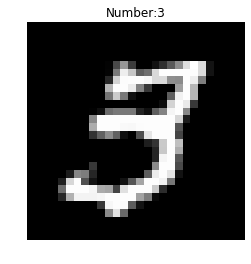

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("Number:" + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [7]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,90,140,221,255,220,19,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,253,253,253,253,220,19,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,142,139,253,237,126,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,159,253,182,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,94,241,253,182,0,0,0,0,0,0


In [8]:
# 預處理
# 圖片特徵(題目) 0~1, 如果要in MLP->攤平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# 答案處理 -> One-Hot Encoding
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
print("答案:", y_train[1])
print("One-Hot:", y_train_cat[1])

答案: 0
One-Hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
#第一層：輸入多大帶入
mlp.add(Dense(input_dim=784, units=128, activation="relu"))
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary()
#1290:128*10(全連接)+10(bias)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 確定訓練方式還有Loss計算
# 最後輸出一個: binary_crossentropy 最後輸出多個: categorical_crossentropy
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# epochs: 整份資料看幾次(10->60000 * 10 = 600000) -> 調整來避免過擬合
# batch: 看幾次一次梯度更新
# ?次: 600000/200 = 3000
# verbose: 打印log的詳細程度
history = mlp.fit(x_train_shape, y_train_cat,
                 batch_size=200, epochs=15, 
                 validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4337 - acc: 0.8820 - val_loss: 0.1953 - val_acc: 0.9473
Epoch 2/15
 - 1s - loss: 0.2013 - acc: 0.9426 - val_loss: 0.1417 - val_acc: 0.9603
Epoch 3/15
 - 1s - loss: 0.1518 - acc: 0.9569 - val_loss: 0.1198 - val_acc: 0.9695
Epoch 4/15
 - 1s - loss: 0.1210 - acc: 0.9655 - val_loss: 0.1125 - val_acc: 0.9682
Epoch 5/15
 - 1s - loss: 0.0997 - acc: 0.9717 - val_loss: 0.0962 - val_acc: 0.9708
Epoch 6/15
 - 1s - loss: 0.0847 - acc: 0.9754 - val_loss: 0.0910 - val_acc: 0.9752
Epoch 7/15
 - 1s - loss: 0.0709 - acc: 0.9795 - val_loss: 0.0828 - val_acc: 0.9760
Epoch 8/15
 - 1s - loss: 0.0613 - acc: 0.9825 - val_loss: 0.0813 - val_acc: 0.9785
Epoch 9/15
 - 1s - loss: 0.0525 - acc: 0.9852 - val_loss: 0.0785 - val_acc: 0.9770
Epoch 10/15
 - 1s - loss: 0.0455 - acc: 0.9876 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 11/15
 - 1s - loss: 0.0393 - acc: 0.9892 - val_loss: 0.0753 - val_acc: 0.9802
Epoch 12/15
 - 1s - loss: 0.0344 - a

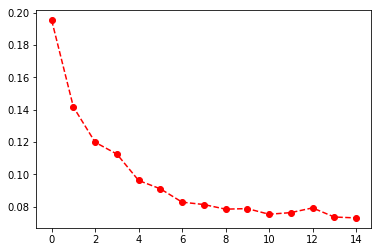

In [12]:
plt.plot(history.history["val_loss"], "ro--")

In [13]:
# evaluate -> predict -> 算metrics
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 17us/step


[0.0713302238047123, 0.9787]

In [14]:

pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,973,0,0,1,1,0,2,1,2,0
1,0,1122,2,3,0,1,2,0,5,0
2,8,1,1001,1,2,0,2,6,11,0
3,1,0,2,988,0,1,1,5,6,6
4,1,0,1,1,957,0,5,2,1,14
5,1,0,0,11,1,864,5,1,6,3
6,5,2,0,1,2,2,945,0,1,0
7,1,4,7,3,0,0,0,1005,1,7
8,5,0,4,4,2,3,2,1,949,4
9,2,3,0,6,6,4,0,4,1,983


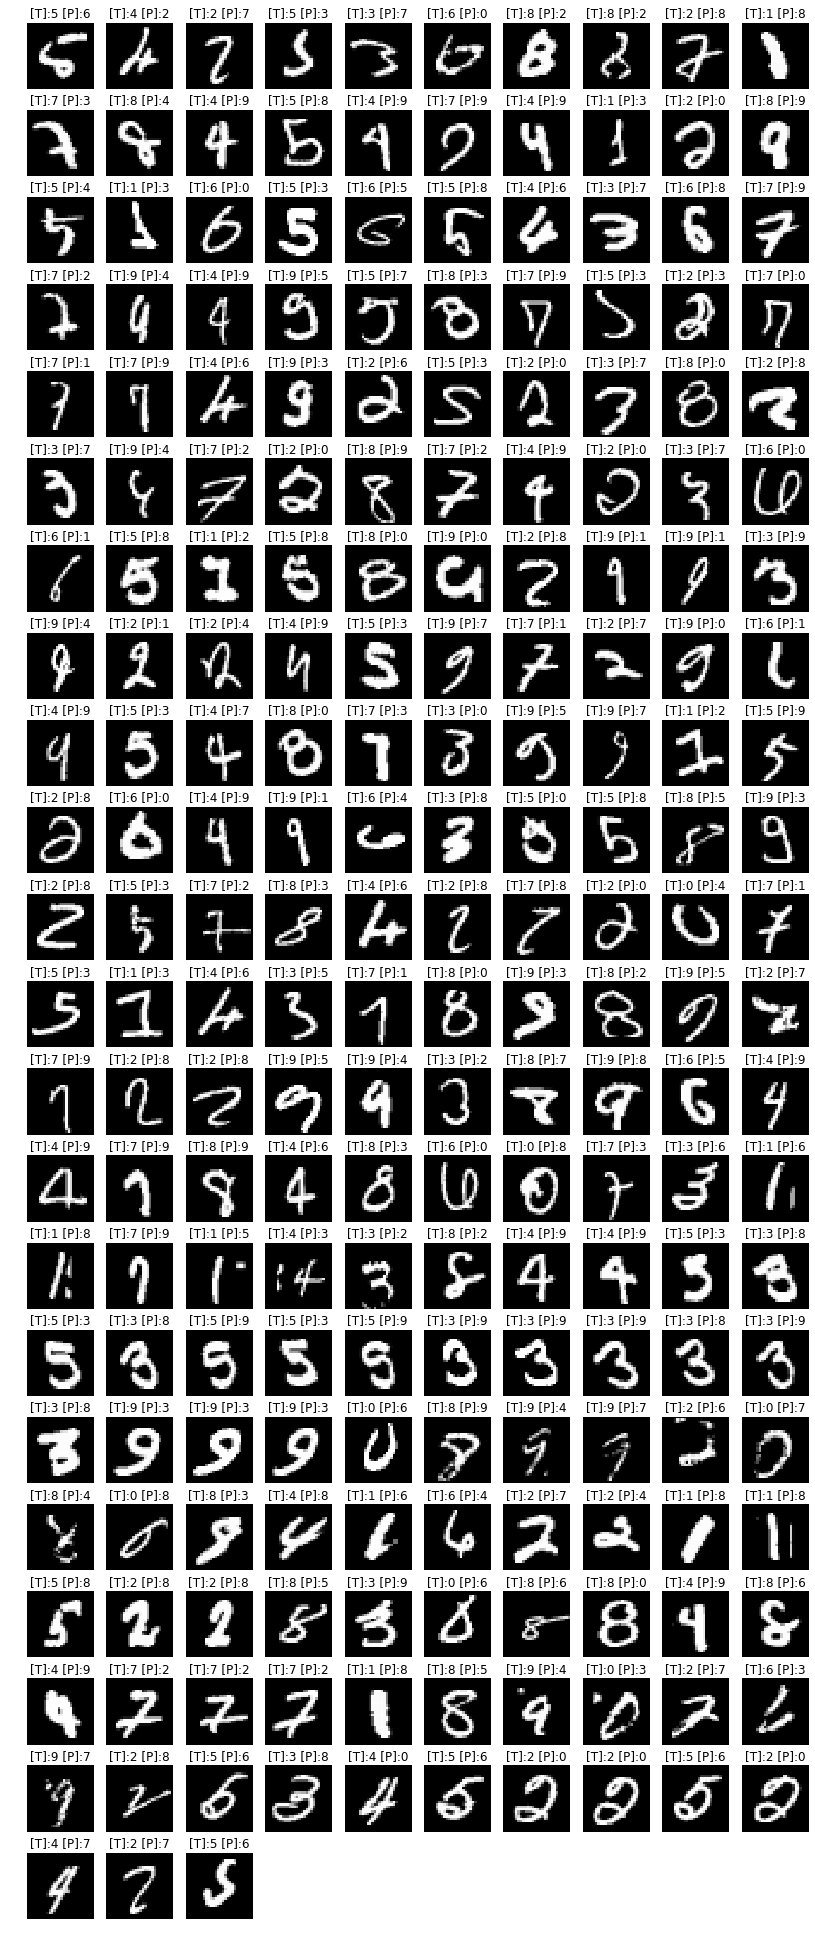

In [15]:
pre_false = []
ans_false = []
img_false = []
for (index, p) in enumerate(pre):
    if not p == y_test[index]:
        pre_false.append(p)
        ans_false.append(y_test[index])
        img_false.append(x_test[index])
        
width = 10
height = int(len(pre_false) / width) + 1
plt.figure(figsize=(14, 35))
for (index, img) in enumerate(img_false):
    plt.subplot(height, width, index + 1)
    # T原始答案　P預測答案
    t = "[T]:" + str(ans_false[index]) + " [P]:" + str(pre_false[index])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")